In [1]:
#!pip install GPyOpt
#!pip install Gpy

import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ConstantKernel, RBF, ExpSineSquared
from sklearn.metrics import mean_absolute_error
import GPy
import GPyOpt
from GPyOpt.methods import BayesianOptimization
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

## Get Data

In [2]:
data_pbp = pd.read_csv("https://raw.githubusercontent.com/damarals/RocketsAnalysis/master/data_gp.csv")
data_pbp.head()

,ID,HomeNameAll,AwayNameAll,Home,Minute,RivalScore,Score
0,21900015,Houston Rockets,Milwaukee Bucks,1,0,0,5
1,21900015,Houston Rockets,Milwaukee Bucks,1,1,0,7
2,21900015,Houston Rockets,Milwaukee Bucks,1,2,2,12
3,21900015,Houston Rockets,Milwaukee Bucks,1,3,5,17
4,21900015,Houston Rockets,Milwaukee Bucks,1,4,5,17


## Split Data for Visualizing

In [3]:
schedules = np.unique(data_pbp.loc[:, "ID"].to_numpy())
schedules

array([21900015, 21900032, 21900045, 21900061, 21900069, 21900086,
       21900093, 21900107, 21900129, 21900142, 21900157, 21900169,
       21900179, 21900193, 21900211, 21900224, 21900235, 21900259,
       21900282, 21900303, 21900318, 21900333, 21900346, 21900356,
       21900371, 21900386, 21900396, 21900419, 21900437, 21900453,
       21900457, 21900478, 21900488, 21900501, 21900520, 21900558,
       21900566, 21900577, 21900600, 21900611, 21900633, 21900645,
       21900662, 21900675, 21900685, 21900698, 21900712, 21900722,
       21900738, 21900752, 21900768, 21900774, 21900790, 21900806,
       21900825, 21900841, 21900853, 21900870, 21900892, 21900903,
       21900927, 21900940, 21900953, 21900963, 21901238, 21901248,
       21901261, 21901273, 21901290, 21901298, 21901304, 21901315])

In [4]:
## Home
# Comb 1
data_train1 = data_pbp[(data_pbp.ID.isin(schedules[0:6])) & (data_pbp.Minute <= 48)]
data_test1 = data_pbp[(data_pbp.ID == schedules[6]) & (data_pbp.Minute <= 48)]

X_train1 = data_train1.iloc[:, [3, 4, 5]].to_numpy()
y_train1 = data_train1.Score.to_numpy()

X_test1 = data_test1.iloc[:, [3, 4, 5]].to_numpy()
y_test1 = data_test1.Score.to_numpy()

# Comb 2
data_train2 = data_pbp[(data_pbp.ID.isin(schedules[16:23])) & (data_pbp.Minute <= 48)]
data_test2 = data_pbp[(data_pbp.ID == schedules[23]) & (data_pbp.Minute <= 48)]

X_train2 = data_train2.iloc[:, [3, 4, 5]].to_numpy()
y_train2 = data_train2.Score.to_numpy()

X_test2 = data_test2.iloc[:, [3, 4, 5]].to_numpy()
y_test2 = data_test2.Score.to_numpy()

# Comb 3
data_train3 = data_pbp[(data_pbp.ID.isin(schedules[24:31])) & (data_pbp.Minute <= 48)]
data_test3 = data_pbp[(data_pbp.ID == schedules[31]) & (data_pbp.Minute <= 48)]

X_train3 = data_train3.iloc[:, [3, 4, 5]].to_numpy()
y_train3 = data_train3.Score.to_numpy()

X_test3 = data_test3.iloc[:, [3, 4, 5]].to_numpy()
y_test3 = data_test3.Score.to_numpy()

# Comb 4
data_train4 = data_pbp[(data_pbp.ID.isin(schedules[32:39])) & (data_pbp.Minute <= 48)]
data_test4 = data_pbp[(data_pbp.ID == schedules[39]) & (data_pbp.Minute <= 48)]

X_train4 = data_train4.iloc[:, [3, 4, 5]].to_numpy()
y_train4 = data_train4.Score.to_numpy()

X_test4 = data_test4.iloc[:, [3, 4, 5]].to_numpy()
y_test4 = data_test4.Score.to_numpy()

## Models for Visualizing

In [5]:
# Ruído Branco
k0 = WhiteKernel(noise_level_bounds = (1e-30, 100))
# Tendência
k1 = ConstantKernel(constant_value_bounds = (1e-30, 100)) * \
  RBF(length_scale_bounds = (1e-20, 500))
# Sazonalidade
k2 = ConstantKernel(constant_value_bounds = (1e-30, 100)) * \
  ExpSineSquared(length_scale_bounds = (1e-20, 500))
  
# GP RBF
gp_opt1_rbf = GaussianProcessRegressor(
    kernel = k0 + k1,
    n_restarts_optimizer = 20,
    random_state = 502670
)
gp_opt2_rbf = GaussianProcessRegressor(
    kernel = k0 + k1,
    n_restarts_optimizer = 20,
    random_state = 502670
)
gp_opt3_rbf = GaussianProcessRegressor(
    kernel = k0 + k1,
    n_restarts_optimizer = 20,
    random_state = 502670
)
gp_opt4_rbf = GaussianProcessRegressor(
    kernel = k0 + k1,
    n_restarts_optimizer = 20,
    random_state = 502670
)

# GP RBF+ExpSin

gp_opt1_rbfexp = GaussianProcessRegressor(
    kernel = k0 + k1 + k2,
    n_restarts_optimizer = 20,
    random_state = 502670
)
gp_opt2_rbfexp = GaussianProcessRegressor(
    kernel = k0 + k1 + k2,
    n_restarts_optimizer = 20,
    random_state = 502670
)
gp_opt3_rbfexp = GaussianProcessRegressor(
    kernel = k0 + k1 + k2,
    n_restarts_optimizer = 20,
    random_state = 502670
)
gp_opt4_rbfexp = GaussianProcessRegressor(
    kernel = k0 + k1 + k2,
    n_restarts_optimizer = 20,
    random_state = 502670
)

## Fit Models for Visualizing

In [6]:
gp_opt1_rbf.fit(X_train1, y_train1.reshape(-1, 1))
gp_opt2_rbf.fit(X_train2, y_train2.reshape(-1, 1))
gp_opt3_rbf.fit(X_train3, y_train3.reshape(-1, 1))
gp_opt4_rbf.fit(X_train4, y_train4.reshape(-1, 1))

gp_opt1_rbfexp.fit(X_train1, y_train1.reshape(-1, 1))
gp_opt2_rbfexp.fit(X_train2, y_train2.reshape(-1, 1))
gp_opt3_rbfexp.fit(X_train3, y_train3.reshape(-1, 1))
gp_opt4_rbfexp.fit(X_train4, y_train4.reshape(-1, 1))

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=WhiteKernel(noise_level=1) + 1**2 * RBF(length_scale=1) + 1**2 * ExpSineSquared(length_scale=1, periodicity=1),
                         n_restarts_optimizer=20, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=502670)

## Prediction and Visualizing

In [7]:
# Generate predictions RBF.
# Pred 1
y_pred1_rbfexp, y_std1_rbfexp = gp_opt1_rbfexp.predict(X_test1, return_std = True)

y_pred1_rbfexp_lwr = y_pred1_rbfexp.flatten() - 2*y_std1_rbfexp
y_pred1_rbfexp_upr = y_pred1_rbfexp.flatten() + 2*y_std1_rbfexp

# Pred 2
y_pred2_rbfexp, y_std2_rbfexp = gp_opt2_rbfexp.predict(X_test2, return_std = True)

y_pred2_rbfexp_lwr = y_pred2_rbfexp.flatten() - 2*y_std2_rbfexp
y_pred2_rbfexp_upr = y_pred2_rbfexp.flatten() + 2*y_std2_rbfexp

# Pred 3
y_pred3_rbfexp, y_std3_rbfexp = gp_opt3_rbfexp.predict(X_test3, return_std = True)

y_pred3_rbfexp_lwr = y_pred3_rbfexp.flatten() - 2*y_std3_rbfexp
y_pred3_rbfexp_upr = y_pred3_rbfexp.flatten() + 2*y_std3_rbfexp

# Pred 4
y_pred4_rbfexp, y_std4_rbfexp = gp_opt4_rbfexp.predict(X_test4, return_std = True)

y_pred4_rbfexp_lwr = y_pred4_rbfexp.flatten() - 2*y_std4_rbfexp
y_pred4_rbfexp_upr = y_pred4_rbfexp.flatten() + 2*y_std4_rbfexp

In [8]:
# Generate predictions RBF + ExpSin.
## Home
# Pred 1
y_pred1_rbf, y_std1_rbf = gp_opt1_rbf.predict(X_test1, return_std = True)

y_pred1_rbf_lwr = y_pred1_rbf.flatten() - 2*y_std1_rbf
y_pred1_rbf_upr = y_pred1_rbf.flatten() + 2*y_std1_rbf

# Pred 2
y_pred2_rbf, y_std2_rbf = gp_opt2_rbf.predict(X_test2, return_std = True)

y_pred2_rbf_lwr = y_pred2_rbf.flatten() - 2*y_std2_rbf
y_pred2_rbf_upr = y_pred2_rbf.flatten() + 2*y_std2_rbf

# Pred 3
y_pred3_rbf, y_std3_rbf = gp_opt3_rbf.predict(X_test3, return_std = True)

y_pred3_rbf_lwr = y_pred3_rbf.flatten() - 2*y_std3_rbf
y_pred3_rbf_upr = y_pred3_rbf.flatten() + 2*y_std3_rbf

# Pred 4
y_pred4_rbf, y_std4_rbf = gp_opt4_rbf.predict(X_test4, return_std = True)

y_pred4_rbf_lwr = y_pred4_rbf.flatten() - 2*y_std4_rbf
y_pred4_rbf_upr = y_pred4_rbf.flatten() + 2*y_std4_rbf

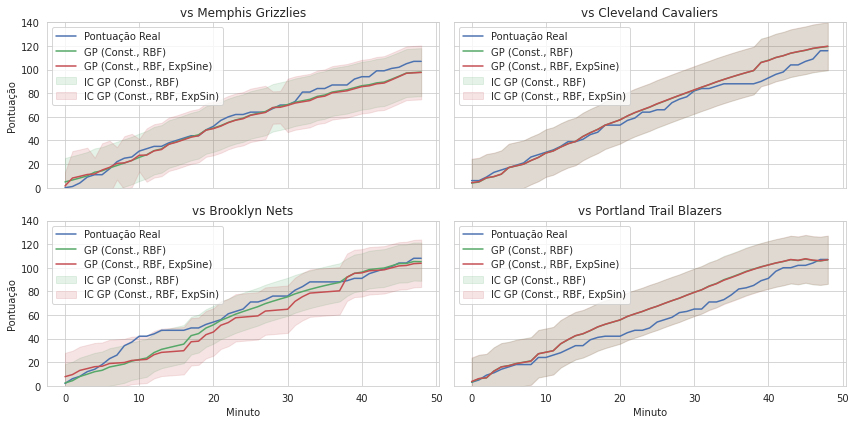

In [9]:
fig, ax = plt.subplots(2, 2, sharey = True, sharex = True, figsize=(12, 6))

ax[0, 0].fill_between(
    x = X_test1[:, 1], 
    y1 = y_pred1_rbf_lwr, 
    y2 = y_pred1_rbf_upr, 
    color = sns_c[2], 
    alpha = 0.15, 
    label = 'IC GP (Const., RBF)'
)
ax[0, 0].fill_between(
    x = X_test1[:, 1], 
    y1 = y_pred1_rbfexp_lwr, 
    y2 = y_pred1_rbfexp_upr, 
    color = sns_c[3], 
    alpha = 0.15, 
    label = 'IC GP (Const., RBF, ExpSin)'
)

ax[0, 1].fill_between(
    x = X_test2[:, 1], 
    y1 = y_pred2_rbf_lwr, 
    y2 = y_pred2_rbf_upr, 
    color = sns_c[2], 
    alpha = 0.15, 
    label = 'IC GP (Const., RBF)'
)
ax[0, 1].fill_between(
    x = X_test2[:, 1], 
    y1 = y_pred2_rbfexp_lwr, 
    y2 = y_pred2_rbfexp_upr, 
    color = sns_c[3], 
    alpha = 0.15, 
    label = 'IC GP (Const., RBF, ExpSin)'
)

ax[1, 0].fill_between(
    x = X_test3[:, 1], 
    y1 = y_pred3_rbf_lwr, 
    y2 = y_pred3_rbf_upr, 
    color = sns_c[2], 
    alpha = 0.15, 
    label = 'IC GP (Const., RBF)'
)
ax[1, 0].fill_between(
    x = X_test3[:, 1], 
    y1 = y_pred3_rbfexp_lwr, 
    y2 = y_pred3_rbfexp_upr, 
    color = sns_c[3], 
    alpha = 0.15, 
    label = 'IC GP (Const., RBF, ExpSin)'
)

ax[1, 1].fill_between(
    x = X_test4[:, 1], 
    y1 = y_pred4_rbf_lwr, 
    y2 = y_pred4_rbf_upr, 
    color = sns_c[2], 
    alpha = 0.15, 
    label = 'IC GP (Const., RBF)'
)
ax[1, 1].fill_between(
    x = X_test4[:, 1], 
    y1 = y_pred4_rbfexp_lwr, 
    y2 = y_pred4_rbfexp_upr, 
    color = sns_c[3], 
    alpha = 0.15, 
    label = 'IC GP (Const., RBF, ExpSin)'
)
#x_ticks_labels = ['1st','2st','3st','4st']

sns.lineplot(ax = ax[0, 0], x = X_test1[:, 1], y = y_test1, color = sns_c[0], label = 'Pontuação Real')
sns.lineplot(ax = ax[0, 0], x = X_test1[:, 1], y = y_pred1_rbf.flatten(), color=sns_c[2], label = 'GP (Const., RBF)')
sns.lineplot(ax = ax[0, 0], x = X_test1[:, 1], y = y_pred1_rbfexp.flatten(), color=sns_c[3], label = 'GP (Const., RBF, ExpSine)')

sns.lineplot(ax = ax[0, 1], x = X_test2[:, 1], y = y_test2, color = sns_c[0], label = 'Pontuação Real')
sns.lineplot(ax = ax[0, 1], x = X_test2[:, 1], y = y_pred2_rbf.flatten(), color=sns_c[2], label = 'GP (Const., RBF)')
sns.lineplot(ax = ax[0, 1], x = X_test2[:, 1], y = y_pred2_rbfexp.flatten(), color=sns_c[3], label = 'GP (Const., RBF, ExpSine)')

sns.lineplot(ax = ax[1, 0], x = X_test3[:, 1], y = y_test3, color = sns_c[0], label = 'Pontuação Real')
sns.lineplot(ax = ax[1, 0], x = X_test3[:, 1], y = y_pred3_rbf.flatten(), color=sns_c[2], label = 'GP (Const., RBF)')
sns.lineplot(ax = ax[1, 0], x = X_test3[:, 1], y = y_pred3_rbfexp.flatten(), color=sns_c[3], label = 'GP (Const., RBF, ExpSine)')

sns.lineplot(ax = ax[1, 1], x = X_test4[:, 1], y = y_test4, color = sns_c[0], label = 'Pontuação Real')
sns.lineplot(ax = ax[1, 1], x = X_test4[:, 1], y = y_pred4_rbf.flatten(), color=sns_c[2], label = 'GP (Const., RBF)')
sns.lineplot(ax = ax[1, 1], x = X_test4[:, 1], y = y_pred4_rbfexp.flatten(), color=sns_c[3], label = 'GP (Const., RBF, ExpSine)')

# Rival Name
name1 = data_pbp[data_pbp.ID == schedules[6]].iloc[:, data_pbp[data_pbp.ID == schedules[6]].Home.to_numpy()[0] + 1].to_numpy()[0]
name2 = data_pbp[data_pbp.ID == schedules[23]].iloc[:, data_pbp[data_pbp.ID == schedules[23]].Home.to_numpy()[0] + 1].to_numpy()[0]
name3 = data_pbp[data_pbp.ID == schedules[31]].iloc[:, data_pbp[data_pbp.ID == schedules[31]].Home.to_numpy()[0] + 1].to_numpy()[0]
name4 = data_pbp[data_pbp.ID == schedules[39]].iloc[:, data_pbp[data_pbp.ID == schedules[39]].Home.to_numpy()[0] + 1].to_numpy()[0]

ax[0, 0].set(title = 'vs {}'.format(name1), 
             xlabel = 'Minuto', ylabel = 'Pontuação')
ax[0, 1].set(title = 'vs {}'.format(name2), 
             xlabel = 'Minuto', ylabel = 'Pontuação')
ax[1, 0].set(title = 'vs {}'.format(name3), 
             xlabel = 'Minuto', ylabel = 'Pontuação')
ax[1, 1].set(title = 'vs {}'.format(name4), 
             xlabel = 'Minuto', ylabel = 'Pontuação')
plt.ylim((0, 140))

fig.tight_layout()
fig.show()

## Run all game combination scenarios and get statistics

In [10]:
R2_RBF = []
R2_RBFExpSin = []
MAE_RBF = []
MAE_RBFExpSin = []

for game in range(7, len(schedules)):

  ## Models
  gp_opt_rbf = GaussianProcessRegressor(
    kernel = k0 + k1,
    n_restarts_optimizer = 20,
    random_state = 502670
  )
  gp_opt_rbfexp = GaussianProcessRegressor(
    kernel = k0 + k1 + k2,
    n_restarts_optimizer = 20,
    random_state = 502670
  )

  ## Data
  data_train = data_pbp[(data_pbp.ID.isin(schedules[game-7:game])) & (data_pbp.Minute <= 48)]
  data_test = data_pbp[(data_pbp.ID == schedules[game]) & (data_pbp.Minute <= 48)]

  X_train = data_train.iloc[:, [3, 4, 5]].to_numpy()
  y_train = data_train.Score.to_numpy()

  X_test = data_test.iloc[:, [3, 4, 5]].to_numpy()
  y_test = data_test.Score.to_numpy()

  ## Fit
  gp_opt_rbf.fit(X_train, y_train.reshape(-1, 1))
  gp_opt_rbfexp.fit(X_train, y_train.reshape(-1, 1))

  ## Prediction
  y_pred_rbf, y_std_rbf = gp_opt_rbf.predict(X_test, return_std = True)
  y_pred_rbf_lwr = y_pred_rbf.flatten() - 2*y_std_rbf
  y_pred_rbf_upr = y_pred_rbf.flatten() + 2*y_std_rbf

  y_pred_rbfexp, y_std_rbfexp = gp_opt_rbfexp.predict(X_test, return_std = True)
  y_pred_rbfexp_lwr = y_pred_rbfexp.flatten() - 2*y_std_rbfexp
  y_pred_rbfexp_upr = y_pred_rbfexp.flatten() + 2*y_std_rbfexp

  ## Get Metrics

  R2_RBF.append(gp_opt1_rbf.score(X = X_test, y = y_test.reshape(-1, 1)))
  R2_RBFExpSin.append(gp_opt1_rbfexp.score(X = X_test, y = y_test.reshape(-1, 1)))
  MAE_RBF.append(mean_absolute_error(y_true = y_test.reshape(-1, 1), y_pred = gp_opt_rbf.predict(X_test)))
  MAE_RBFExpSin.append(mean_absolute_error(y_true = y_test.reshape(-1, 1), y_pred = gp_opt_rbfexp.predict(X_test)))

## Export Statistics

In [11]:
metrics = pd.DataFrame({"R2_RBF": R2_RBF,
                        "R2_RBFExpSin": R2_RBFExpSin,
                        "MAE_RBF": MAE_RBF,
                        "MAE_RBFExpsin": MAE_RBFExpSin})
metrics.to_csv("metrics.csv")

## Table of Statistics

In [12]:
R2_RBF = np.round(R2_RBF, 4)
R2_RBFExpSin = np.round(R2_RBFExpSin, 4)
MAE_RBF = np.round(MAE_RBF, 4)
MAE_RBFExpSin = np.round(MAE_RBFExpSin, 4)

In [13]:
R2_table = pd.DataFrame({"Kernel": ["RBF", "RBF+ExpSin"], 
              "Min": [np.min(R2_RBF), np.min(R2_RBFExpSin)],
              "Q1": [np.quantile(R2_RBF, 0.25), np.quantile(R2_RBFExpSin, 0.25)],
              "Mean": [np.mean(R2_RBF), np.mean(R2_RBFExpSin)], 
              "Median": [np.median(R2_RBF), np.median(R2_RBFExpSin)], 
              "Q3": [np.quantile(R2_RBF, 0.75), np.quantile(R2_RBFExpSin, 0.75)],
              "Max": [np.max(R2_RBF), np.max(R2_RBFExpSin)]})

MAE_table = pd.DataFrame({"Kernel": ["RBF", "RBF+ExpSin"], 
              "Min": [np.min(MAE_RBF), np.min(MAE_RBFExpSin)],
              "Q1": [np.quantile(MAE_RBF, 0.25), np.quantile(MAE_RBFExpSin, 0.25)],
              "Mean": [np.mean(MAE_RBF), np.mean(MAE_RBFExpSin)], 
              "Median": [np.median(MAE_RBF), np.median(MAE_RBFExpSin)], 
              "Q3": [np.quantile(MAE_RBF, 0.75), np.quantile(MAE_RBFExpSin, 0.75)],
              "Max": [np.max(MAE_RBF), np.max(MAE_RBFExpSin)]})

In [14]:
R2_table

,Kernel,Min,Q1,Mean,Median,Q3,Max
0,RBF,0.5115,0.8890,0.911343,0.9449,0.9666,0.9907
1,RBF+ExpSin,0.5106,0.8799,0.907515,0.9399,0.9639,0.9867


In [15]:
MAE_table

,Kernel,Min,Q1,Mean,Median,Q3,Max
0,RBF,2.3574,4.7850,8.147778,6.1745,10.0557,25.8526
1,RBF+ExpSin,2.3495,5.1299,10.814594,8.5890,13.2030,33.8727
